# Cleaning and pre-processing dataset
In this round, we will use stemming techniques instead of lemm technique. As we have already done in first cleaning attempt.

# 1) Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [4]:
# For Processing
import re
import nltk
import pandas as pd
import numpy as np
import gensim
import string

In [5]:
# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [6]:
# Import packages for text analysis and modeling
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve, GridSearchCV

# 2)- Loading datset

In [7]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('self_drive.csv')
data.columns

Index(['sentiment', 'text'], dtype='object')

In [8]:
data.head()

,sentiment,text
0,5,@manjulamartin @Kirk_Gleason Except trains are...
1,5,I want a Google driverless car.
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...
4,5,@google is making driverless cars which is awe...


In [9]:
data['text'][0]

'@manjulamartin @Kirk_Gleason Except trains are very capital intensive and have limited mobility. Driverless cars are the best of both worlds'

# 3)- Visualize what we have

In [10]:
check_words=data['text']

### Plotting for the Top 50 word frequencies

In [11]:
all_words = check_words.str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (uncleaned) Word frequencies in the dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

### Plotting  for the Bottom 100 word frequencies

In [12]:
data = [go.Bar(
            x = all_words.index.values[-100:],
            y = all_words.values[-100:],
            marker= dict(colorscale='Portland',
                         color = all_words.values[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies before cleaning'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# 4) Cleaning and preprocessing data

In [13]:
data = pd.read_csv('self_drive.csv')

### 4.1) Removing punctions

In [14]:
#Funtion to remove punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [15]:
data['cleaned_round2'] = data['text'].apply(remove_punctuation)
print("After cleaning punctuation and extra characters: \n",data['cleaned_round2'][19])

After cleaning punctuation and extra characters: 
 SKYNET Ì¢‰âÂÒSheriJo I am for driverless cars Sick of the accidents injuries deaths people driving recklessly all the time It must stopÌ¢‰âÂå


In [16]:
#Before cleaning
print("Before cleaning punctuation and extra characters: \n",data['text'][19])

Before cleaning punctuation and extra characters: 
 #SKYNET Ì¢‰âÂÒ@SheriJo: I am for driverless cars. Sick of the accidents, injuries, deaths, people driving recklessly all the time. It must stop.Ì¢‰âÂå


In [17]:
data.head()

,sentiment,text,cleaned_round2
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin KirkGleason Except trains are ve...
1,5,I want a Google driverless car.,I want a Google driverless car
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,Oatmeal google driverless TeslaMotors Ooooh t...
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,SO MUCH AWESOME Amazing video for GoogleÌ¢‰âÂ‰...
4,5,@google is making driverless cars which is awe...,google is making driverless cars which is awes...


We can see some noisy characters are removed.

In [18]:
# Remo0ving more extra text

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [19]:
# Let's take a look at the updated text
data['cleaned_round2'] = data['cleaned_round2'].apply(round1)
data['cleaned_round2'][19]

'skynet ì¢‰ââ\x81òsherijo i am for driverless cars sick of the accidents injuries deaths people driving recklessly all the time it must stopì¢‰ââå\x9d'

In [20]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text=re.sub('[^a-zA-Z]', ' ' ,text)
    return text

round2 = lambda x: clean_text_round2(x)

In [21]:
# Let's take a look at the updated text
data['cleaned_round2'] = data['cleaned_round2'].apply(round2)
data['cleaned_round2'][19]

'skynet        sherijo i am for driverless cars sick of the accidents injuries deaths people driving recklessly all the time it must stop       '

### 4.2)- Removing stopwords

In [22]:
#Extract the stop words from nltk library. We may make our own list too
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [23]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [24]:
#Function to remove stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [25]:
data['cleaned_round2'] = data['cleaned_round2'].apply(stopwords)
print("After applying stopwords: \n",data['cleaned_round2'][19])

After applying stopwords: 
 skynet sherijo driverless cars sick accidents injuries deaths people driving recklessly time must stop


### 4.3)  Stemming

Let's check topwords before doing any stemming

#### a)Collect vocabulary count

In [26]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['cleaned_round2'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items() 

#### b)Store the vocab and counts in a pandas dataframe

In [27]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

#### c)Bar plot of top words before stemming

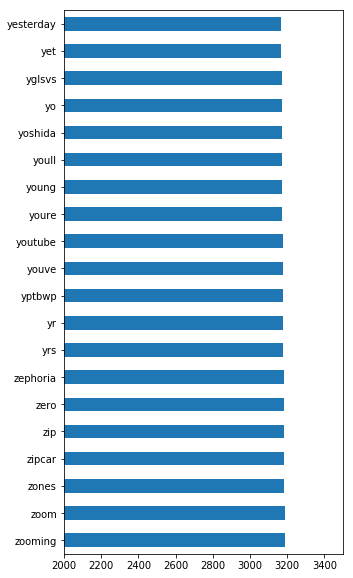

In [28]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (2000, 3500)) ## xlim= (25230, 25260))

#### d)Stemming operations
Stemming operation bundles together words of same root. E.g. stem operation bundles "response" and "respond" into a common "respon"

In [29]:
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [30]:
#Apply the function to each datapoint
data['cleaned_round2'] = data['cleaned_round2'].apply(stemming)
data['cleaned_round2'][19]

'skynet sherijo driverless car sick accid injuri death peopl drive reckless time must stop'

**Top words after stemming operation**

#### e)Collect vocabulary count

In [31]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(data['cleaned_round2'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()  

#### f)Bar plot of top words after stemming

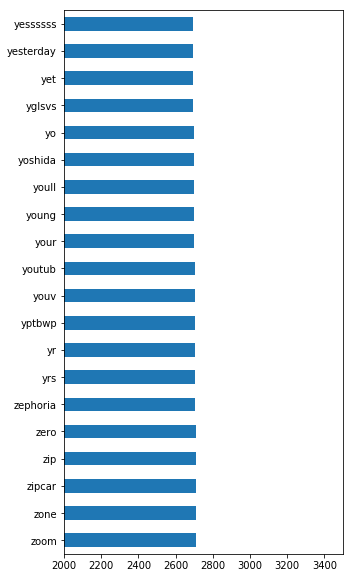

In [32]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (2000, 3500))

# 5) Saving cleaned file

In [33]:
data.to_csv('self_drive_clean_round2.csv', index= False, encoding= 'utf-8')

# 6) Visualize after clean

In [34]:
clean_round2=data['cleaned_round2']

In [35]:
clean_round2[:5]

0    manjulamartin kirkgleason except train capit i...
1                            want googl driverless car
2    oatmeal googl driverless teslamotor ooooh woul...
3    much awesom amaz video googl next phase driver...
4                     googl make driverless car awesom
Name: cleaned_round2, dtype: object

## checking top 50 words after cleaning

In [36]:
all_words = clean_round2.str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (cleaned) Word frequencies in the dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')




## Plotting for the Bottom 100 words

In [37]:
data = [go.Bar(
            x = all_words.index.values[-100:],
            y = all_words.values[-100:],
            marker= dict(colorscale='Portland',
                         color = all_words.values[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')